In [10]:
import tensorflow as tf
from tensorflow.keras import preprocessing, layers, Sequential, utils
from Myfunc import show_lcurve

Model: "RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, 10, 6)             60000     
_________________________________________________________________
RNN (SimpleRNN)              (None, 4)                 44        
_________________________________________________________________
classifier (Dense)           (None, 1)                 5         
Total params: 60,049
Trainable params: 60,049
Non-trainable params: 0
_________________________________________________________________


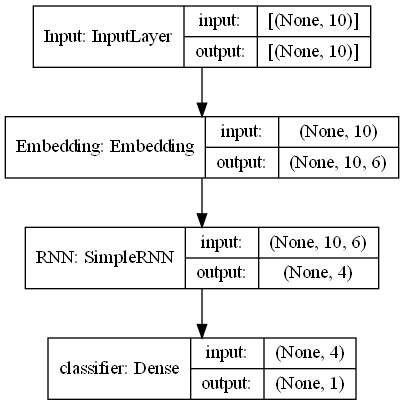

In [52]:
EMD_DIMS = 6
MAX_LEN = 10
MAX_FEATURES = 10000

model = Sequential(name="RNN")
model.add(layers.Input(shape=MAX_LEN, name="Input"))
model.add(layers.Embedding(input_dim=10000, output_dim=EMD_DIMS, name="Embedding"))
model.add(layers.SimpleRNN(4, name="RNN")) # channels_last 가 디폴트 , # channels_last 를 해주면 각 행별 평균을 한다
model.add(layers.Dense(1, activation="sigmoid", name="classifier"))
model.summary()
utils.plot_model(model, show_shapes=True)

In [53]:
import numpy as np

In [42]:
timesteps = 10 # 단어의 개수 256 -> 10
input_dim = 6 # 임베딩 아웃풋 32 -> 6
hidden_units = 4 # RNN 노드 개수 32 -> 4
# 입력에 해당되는 2D 텐서
inputs = np.random.random((timesteps, input_dim))
inputs.shape

(10, 6)

In [54]:
# 10개의 (32,)
inputs[0], inputs[9]

(array([0.75989621, 0.68042876, 0.3065464 , 0.56762763, 0.61315184,
        0.46367387]),
 array([0.04417823, 0.7084128 , 0.51543125, 0.77244701, 0.60342653,
        0.89025227]))

In [55]:
# 초기 은닉 상태는 0(벡터)로 초기화
hidden_state_t = np.zeros((hidden_units,)) 
hidden_state_t.shape

(4,)

In [56]:
print('초기 은닉 상태 :',hidden_state_t)

초기 은닉 상태 : [0. 0. 0. 0.]


In [47]:
Wx = np.random.random((hidden_units, input_dim))  # (4, 6)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_units, hidden_units)) # (4, 4)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_units,)) # (4,)크기의 1D 텐서 생성. 이 값은 편향(bias).

In [48]:
print('가중치 Wx의 크기(shape) :',np.shape(Wx))
print('가중치 Wh의 크기(shape) :',np.shape(Wh))
print('편향의 크기(shape) :',np.shape(b))

가중치 Wx의 크기(shape) : (4, 6)
가중치 Wh의 크기(shape) : (4, 4)
편향의 크기(shape) : (4,)


In [51]:
total_hidden_states = []

# 각 시점 별 입력값.
for input_t in inputs:

    # Wx * Xt + Wh * Ht-1 + b(bias)
    output_t = np.tanh(np.dot(Wx, input_t) + np.dot(Wh, hidden_state_t) + b)

    # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep t, output_dim)
    # 각 시점의 은닉 상태의 값을 계속해서 누적
    total_hidden_states.append(list(output_t))
    hidden_state_t = output_t

# 출력 시 값을 깔끔하게 해주는 용도.
total_hidden_states = np.stack(total_hidden_states, axis=0)

# (timesteps, output_dim)
print('모든 시점의 은닉 상태 :')
print(total_hidden_states.shape)

모든 시점의 은닉 상태 :
(10, 4)


In [50]:
total_hidden_states

array([[0.97549198, 0.97374455, 0.9876285 , 0.99060134],
       [0.99886752, 0.99800764, 0.99934635, 0.99940729],
       [0.99535048, 0.99475296, 0.99775318, 0.99888999],
       [0.99782838, 0.9970975 , 0.99919878, 0.99967239],
       [0.99865969, 0.99941619, 0.99965536, 0.99987252],
       [0.99889531, 0.9978234 , 0.99946556, 0.99960101],
       [0.99879678, 0.99855133, 0.99958406, 0.99964794],
       [0.99936712, 0.99918839, 0.99968612, 0.99949766],
       [0.99766777, 0.99853008, 0.99933689, 0.99976426],
       [0.99956307, 0.9988545 , 0.99969205, 0.99980818]])